<a href="https://colab.research.google.com/github/albertofernandezvillan/ml-dl-cv-notebooks/blob/main/keras_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References:

- https://www.tensorflow.org/tutorials/keras/classification?hl=es-419
- https://www.pyimagesearch.com/2019/02/11/fashion-mnist-with-keras-and-deep-learning/
- https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

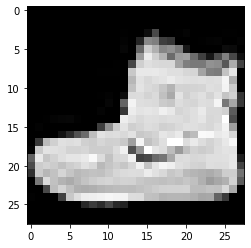

In [3]:
plt.imshow(x_train[0], cmap='gray')

In [4]:
def range_arr(x):
  return (np.min(x), np.max(x))

In [5]:
print(range_arr(x_train[0]))
print(y_train[0])

(0, 255)
9


In [6]:
# A common practice is to normalize data in the rage [0,1] instead of [0, 255]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
print(range_arr(x_train[0]))

(0.0, 1.0)


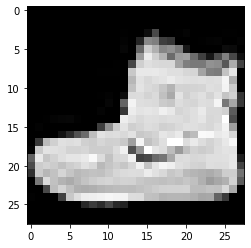

In [8]:
plt.imshow(x_train[0], cmap='gray')

In [9]:
# When using InputLayer with Keras Sequential model, it can be skipped by
# moving the input_shape parameter to the first layer after the InputLayer

# Without InputLayer and let the first layer to have the input_shape,
# Keras will add a input for the model behind the scene.

def build_simple_model_sequential(in_shape, num_classes):
  # Groups a linear stack of layers into a tf.keras.Model
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.InputLayer(input_shape=in_shape))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128, activation='relu'))
  model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

  return model  

In [10]:
my_model = build_simple_model_sequential((28,28), 10)

In [11]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


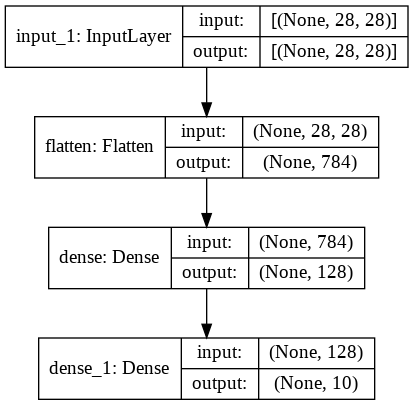

In [16]:
tf.keras.utils.plot_model(my_model, to_file='my_model.png', show_shapes=True, show_layer_names=True)

In [17]:
my_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
history = my_model.fit(x = x_train, y = y_train, batch_size= 128, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.5565 - accuracy: 0.8078 - val_loss: 0.4611 - val_accuracy: 0.8389
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4064 - accuracy: 0.8578 - val_loss: 0.4282 - val_accuracy: 0.8472
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3650 - accuracy: 0.8692 - val_loss: 0.4215 - val_accuracy: 0.8474
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3402 - accuracy: 0.8788 - val_loss: 0.3732 - val_accuracy: 0.8664
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3215 - accuracy: 0.8845 - val_loss: 0.3682 - val_accuracy: 0.8694
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3024 - accuracy: 0.8903 - val_loss: 0.3578 - val_accuracy: 0.8727
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2912 - accuracy: 0.8954 - val_loss: 0.3549 - val_accuracy: 0.8744
Epoch 

In [19]:
# To 'expand' the dimensions we can also perform 
#  np.expand_dims(x_test[0], 0)
predictions = my_model.predict(x_test[0].reshape(1, 28, 28))

print(predictions.shape)

(1, 10)


In [20]:
np.argmax(predictions[0])

9

In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

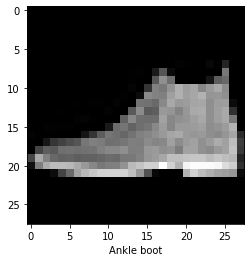

In [22]:
plt.imshow(x_test[0], cmap='gray')
plt.xlabel(class_names[np.argmax(predictions[0])])
plt.show()

In [23]:
my_model.save('keras_fashion.h5')

In [24]:
my_model_reconstructed = tf.keras.models.load_model('keras_fashion.h5')

In [25]:
my_model_reconstructed.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
# In this case the metrics are: 
# accuracy, loss, val_accuracy, val_loss
history.history

{'accuracy': [0.8078166842460632,
  0.8578333258628845,
  0.8691999912261963,
  0.8788333535194397,
  0.8845499753952026,
  0.8902666568756104,
  0.8954333066940308,
  0.8977000117301941,
  0.9016833305358887,
  0.9056333303451538],
 'loss': [0.5565106868743896,
  0.4063704013824463,
  0.3649647533893585,
  0.34024477005004883,
  0.32145261764526367,
  0.30235275626182556,
  0.29122912883758545,
  0.281991571187973,
  0.271994024515152,
  0.26162466406822205],
 'val_accuracy': [0.8389000296592712,
  0.8471999764442444,
  0.8474000096321106,
  0.8664000034332275,
  0.8694000244140625,
  0.8726999759674072,
  0.8744000196456909,
  0.880299985408783,
  0.878000020980835,
  0.8805999755859375],
 'val_loss': [0.46111446619033813,
  0.42815595865249634,
  0.42153945565223694,
  0.3731966018676758,
  0.36816418170928955,
  0.357767254114151,
  0.3548889756202698,
  0.3366435468196869,
  0.349056214094162,
  0.3423554599285126]}

In [36]:
def plot_metric(history, metric):
  history_train_metric = history.history[metric]
  history_val_metric = history.history['val_'+metric]

  epochs = range(1, len(history_train_metric) + 1)

  # First we plot the train metric and then, the test metric
  # Therefore, the legend is built accordingly
  plt.plot(epochs, history_train_metric, 'bo--')
  plt.plot(epochs, history_val_metric, 'ro-')
  plt.legend(["train_"+metric, "test_"+metric])

  plt.xlabel("Epochs")
  plt.ylabel(metric) 

  plt.show()

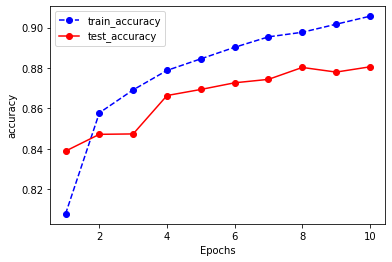

In [37]:
plot_metric(history, 'accuracy')

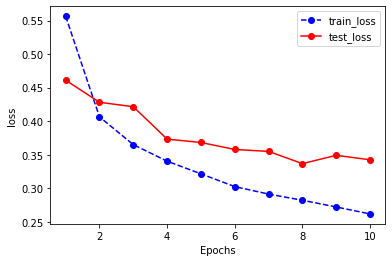

In [38]:
plot_metric(history, 'loss')

In [41]:
from sklearn.metrics import classification_report

In [39]:
predictions = np.argmax(my_model.predict(x_test), axis = 1)

In [42]:
# This function needs both y_true and y_predicted
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.77      0.84      0.80      1000
           3       0.89      0.87      0.88      1000
           4       0.82      0.78      0.80      1000
           5       0.98      0.94      0.96      1000
           6       0.67      0.74      0.70      1000
           7       0.92      0.96      0.94      1000
           8       0.99      0.95      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

